In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the Excel file
df = pd.read_excel('coffe shop data python analysis.xlsx')

# Print the dataframe
print(df.head())

   transaction_id transaction_date transaction_time  store_id store_location  \
0          114301       2023-06-01         11:33:29         3        Astoria   
1          115405       2023-06-02         11:18:24         3        Astoria   
2          115478       2023-06-02         12:02:45         3        Astoria   
3          116288       2023-06-02         19:39:47         3        Astoria   
4          116714       2023-06-03         12:24:57         3        Astoria   

   product_id  transaction_qty  unit_price product_category  \
0          45                1         3.0              Tea   
1          45                1         3.0              Tea   
2          45                1         3.0              Tea   
3          45                1         3.0              Tea   
4          45                1         3.0              Tea   

        product_type product_detail   Size  Total bill Month Name  Day Name  \
0  Brewed herbal tea     Peppermint  Large         3.0       

In [7]:
df.describe()

,transaction_id,transaction_date,store_id,product_id,transaction_qty,unit_price,Total bill,Hour,Day of Week,Month
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.00000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,5.342063,47.918607,1.438276,3.382219,4.686367,11.735790,2.99202,3.988881
min,1.000000,2023-01-01 00:00:00,3.000000,1.000000,1.000000,0.800000,0.800000,6.000000,0.00000,1.000000
25%,37335.750000,2023-03-06 00:00:00,3.000000,33.000000,1.000000,2.500000,3.000000,9.000000,1.00000,3.000000
50%,74727.500000,2023-04-24 00:00:00,5.000000,47.000000,1.000000,3.000000,3.750000,11.000000,3.00000,4.000000
75%,112094.250000,2023-05-30 00:00:00,8.000000,60.000000,2.000000,3.750000,6.000000,15.000000,5.00000,5.000000
max,149456.000000,2023-06-30 00:00:00,8.000000,87.000000,8.000000,45.000000,360.000000,20.000000,6.00000,6.000000
std,43153.600016,NaN,2.074241,17.930020,0.542509,2.658723,4.227099,3.764662,1.99028,1.673091


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   store_id          149116 non-null  int64         
 4   store_location    149116 non-null  object        
 5   product_id        149116 non-null  int64         
 6   transaction_qty   149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
 11  Size              149116 non-null  object        
 12  Total bill        149116 non-null  float64       
 13  Month Name        149116 non-null  object        
 14  Day 

In [9]:
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
store_id            0
store_location      0
product_id          0
transaction_qty     0
unit_price          0
product_category    0
product_type        0
product_detail      0
Size                0
Total bill          0
Month Name          0
Day Name            0
Hour                0
Day of Week         0
Month               0
dtype: int64

In [10]:
df.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,product_category,product_type,product_detail,Size,Total bill,Month Name,Day Name,Hour,Day of Week,Month
0,114301,2023-06-01,11:33:29,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,3.0,June,Thursday,11,4,6
1,115405,2023-06-02,11:18:24,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,3.0,June,Friday,11,5,6
2,115478,2023-06-02,12:02:45,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,3.0,June,Friday,12,5,6
3,116288,2023-06-02,19:39:47,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,3.0,June,Friday,19,5,6
4,116714,2023-06-03,12:24:57,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,3.0,June,Saturday,12,6,6


In [13]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['Month'] = df['transaction_date'].dt.month
df['Day of Week'] = df['transaction_date'].dt.dayofweek

# 1.Total Revenue Calculation

    store_location  Total_bill
0          Astoria   232243.91
1   Hell's Kitchen   236511.17
2  Lower Manhattan   230057.25


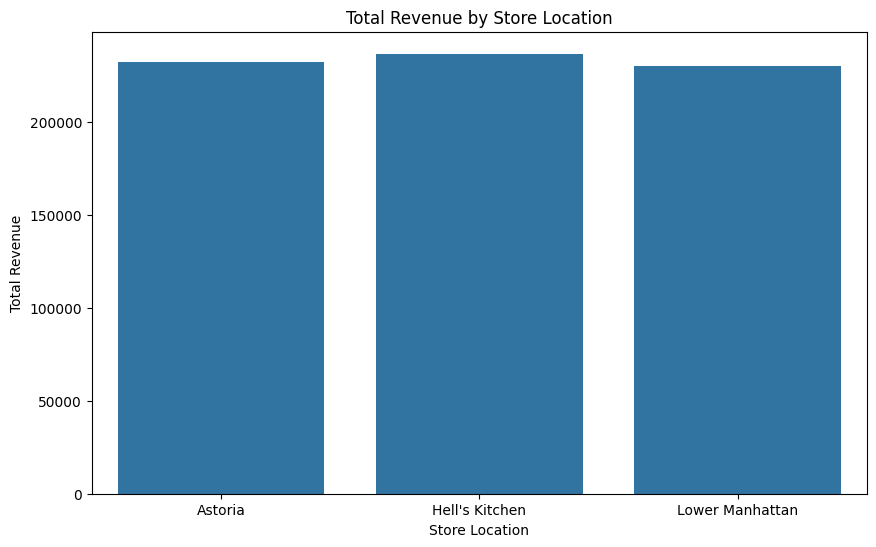

In [14]:
# Calculate the total revenue per store location
df['Total_bill'] = df['transaction_qty'] * df['unit_price']
total_revenue = df.groupby('store_location')['Total_bill'].sum().reset_index()

print(total_revenue)

# Plot the total revenue per store location
plt.figure(figsize=(10, 6))
sns.barplot(x='store_location', y='Total_bill', data=total_revenue)
plt.title('Total Revenue by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Total Revenue')
plt.show()

# 2.Top-Selling Products

    product_id  transaction_qty
49          50             4708
58          59             4668
53          54             4643
37          38             4602
43          44             4564
28          29             4547
51          52             4512
38          39             4497
21          22             4484
45          46             4477


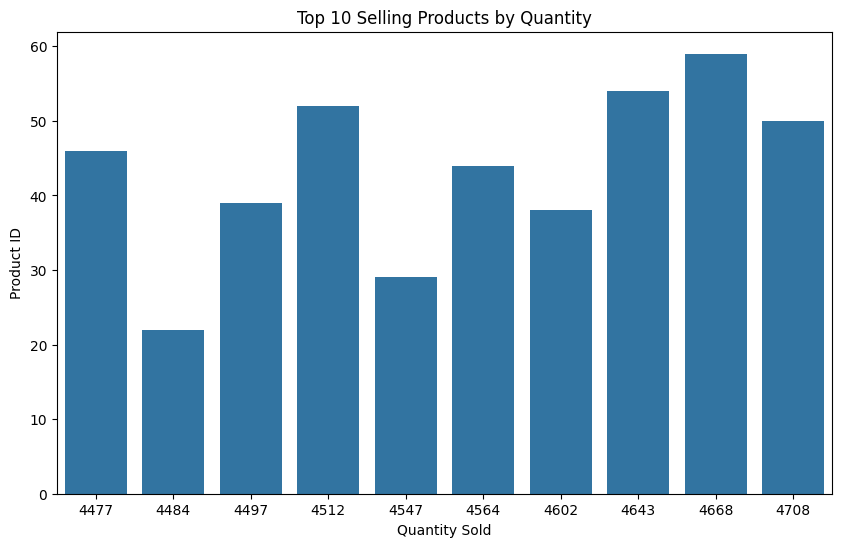

In [15]:
# Find the top-selling products by quantity
top_selling_products = df.groupby('product_id')['transaction_qty'].sum().reset_index()
top_selling_products = top_selling_products.sort_values(by='transaction_qty', ascending=False)

print(top_selling_products.head(10))  # Display the top 10 selling products

# Plot the top 10 selling products
plt.figure(figsize=(10, 6))
sns.barplot(x='transaction_qty', y='product_id', data=top_selling_products.head(10))
plt.title('Top 10 Selling Products by Quantity')
plt.xlabel('Quantity Sold')
plt.ylabel('Product ID')
plt.show()

# 3.Monthly Sales Trend

   Month  Total_bill
0      1    81677.74
1      2    76145.19
2      3    98834.68
3      4   118941.08
4      5   156727.76
5      6   166485.88


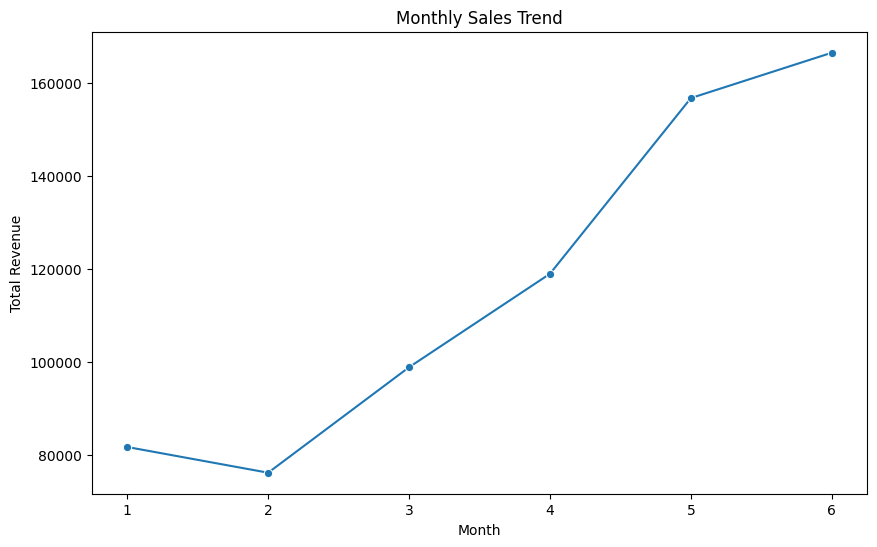

In [16]:
# Calculate monthly sales
monthly_sales = df.groupby('Month')['Total_bill'].sum().reset_index()

print(monthly_sales)

# Plot the monthly sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Total_bill', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

# 4.Peak Shopping Hours

    Hour  transaction_id
0      6            4594
1      7           13428
2      8           17654
3      9           17764
4     10           18545
5     11            9766
6     12            8708
7     13            8714
8     14            8933
9     15            8979
10    16            9093
11    17            8745
12    18            7498
13    19            6092
14    20             603


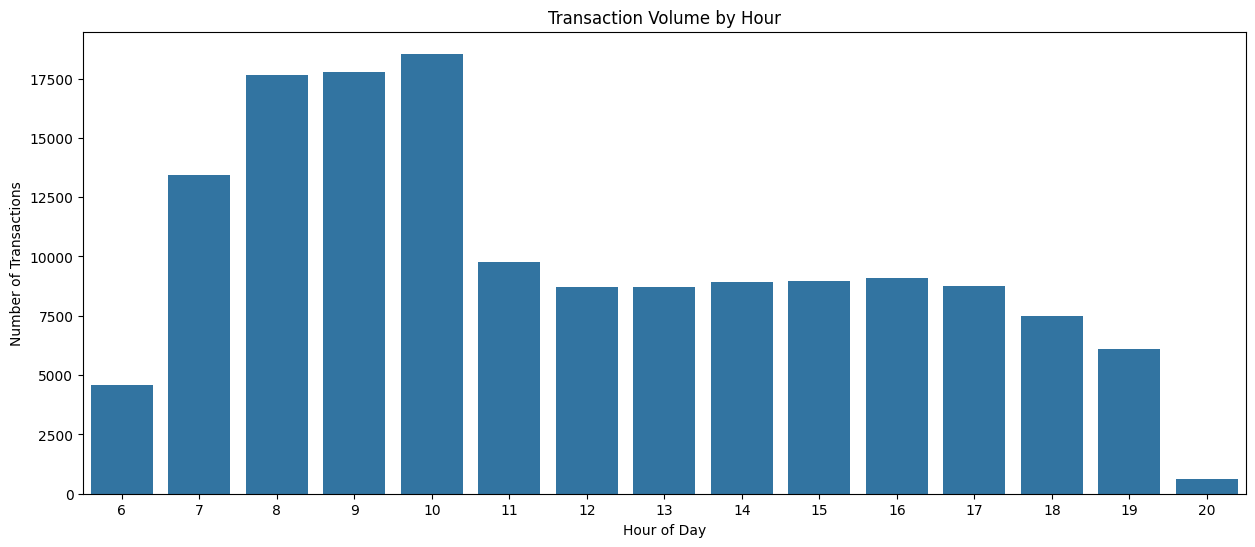

In [31]:
# Extract the hour from the transaction_time
df['Hour'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.hour

# Calculate transaction volume by hour
hourly_transactions = df.groupby('Hour')['transaction_id'].count().reset_index()

print(hourly_transactions)

# Plot transaction volume by hour
plt.figure(figsize=(15, 6))
sns.barplot(x='Hour', y='transaction_id', data=hourly_transactions)
plt.title('Transaction Volume by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.show()

# 5.Product Category Analysis

     product_category  Total_bill
0              Bakery    82315.64
1             Branded    13607.00
2              Coffee   269952.45
3        Coffee beans    40085.25
4  Drinking Chocolate    72416.00
5            Flavours     8408.80
6           Loose Tea    11213.60
7  Packaged Chocolate     4407.64
8                 Tea   196405.95


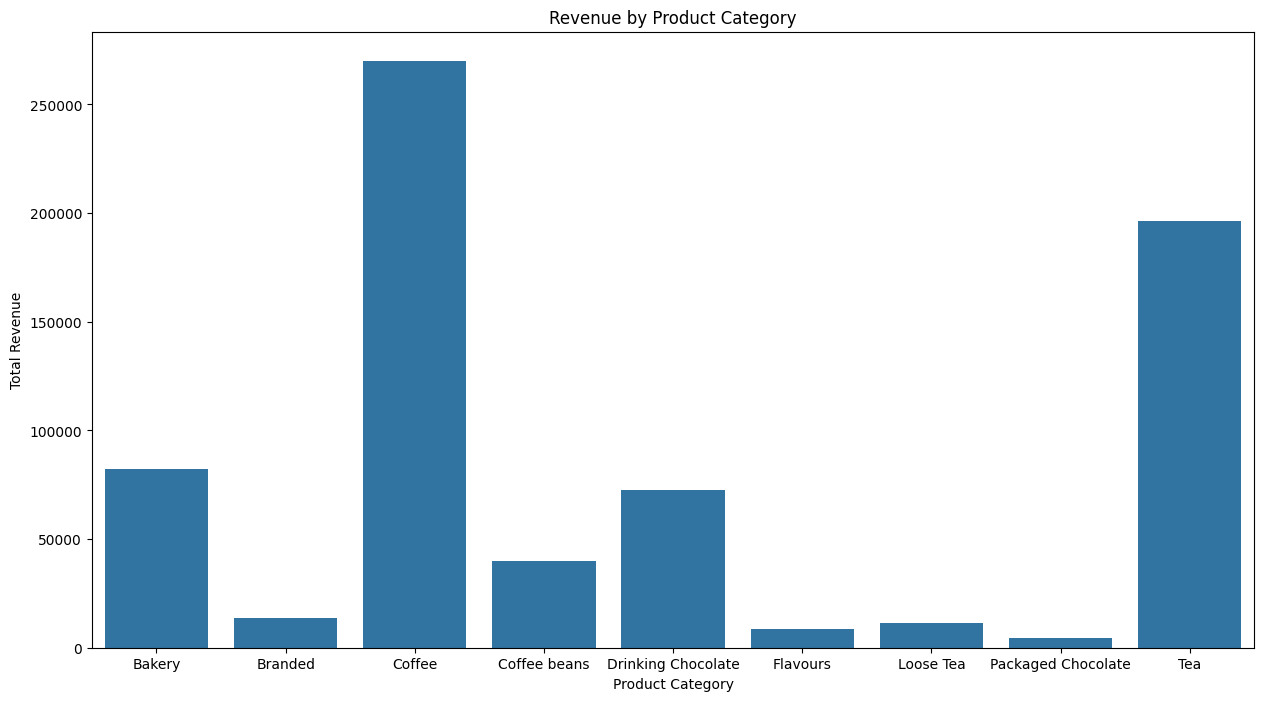

In [23]:
# Calculate revenue by product category
category_revenue = df.groupby('product_category')['Total_bill'].sum().reset_index()

print(category_revenue)

# Plot revenue by product category
plt.figure(figsize=(15, 8))
sns.barplot(x='product_category', y='Total_bill', data=category_revenue)
plt.title('Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.show()

# 6.Average Transaction Value

    store_location  Total_bill
0          Astoria    4.589891
1   Hell's Kitchen    4.661696
2  Lower Manhattan    4.814726


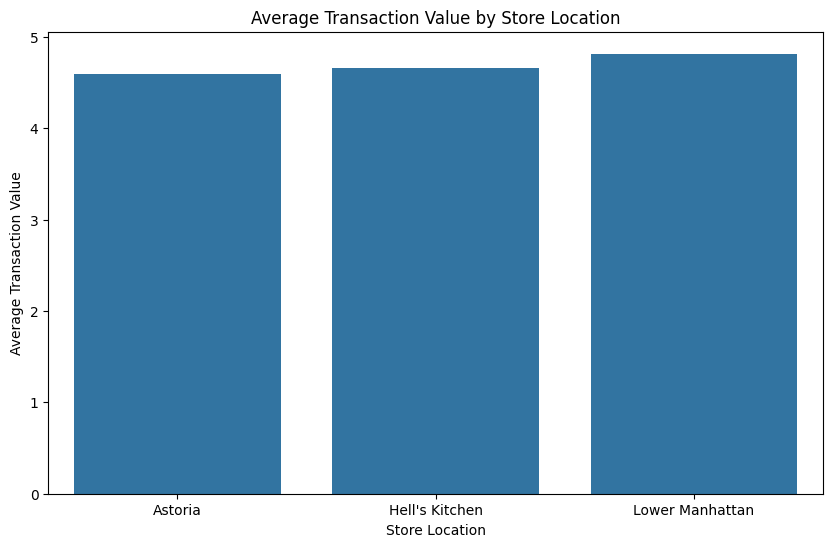

In [24]:
# Calculate the average transaction value per store location
average_transaction_value = df.groupby('store_location')['Total_bill'].mean().reset_index()

print(average_transaction_value)

# Plot the average transaction value per store location
plt.figure(figsize=(10, 6))
sns.barplot(x='store_location', y='Total_bill', data=average_transaction_value)
plt.title('Average Transaction Value by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Average Transaction Value')
plt.show()

# 7.Day of the Week Analysis

   Day of Week  Total_bill
0            0   101677.28
1            1    99455.94
2            2   100313.54
3            3   100767.78
4            4   101373.00
5            5    96894.48
6            6    98330.31


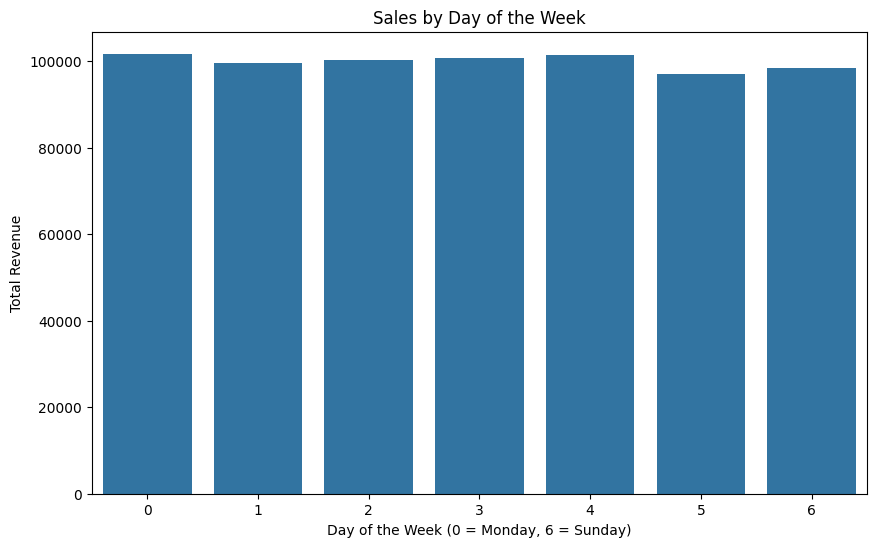

In [26]:
# Calculate sales by day of the week
weekday_sales = df.groupby('Day of Week')['Total_bill'].sum().reset_index()

print(weekday_sales)

# Plot sales by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x='Day of Week', y='Total_bill', data=weekday_sales)
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Total Revenue')
plt.show()

# 8.Store Performance Comparison

    store_location  Total_bill  transaction_id
0          Astoria   232243.91           50599
1   Hell's Kitchen   236511.17           50735
2  Lower Manhattan   230057.25           47782


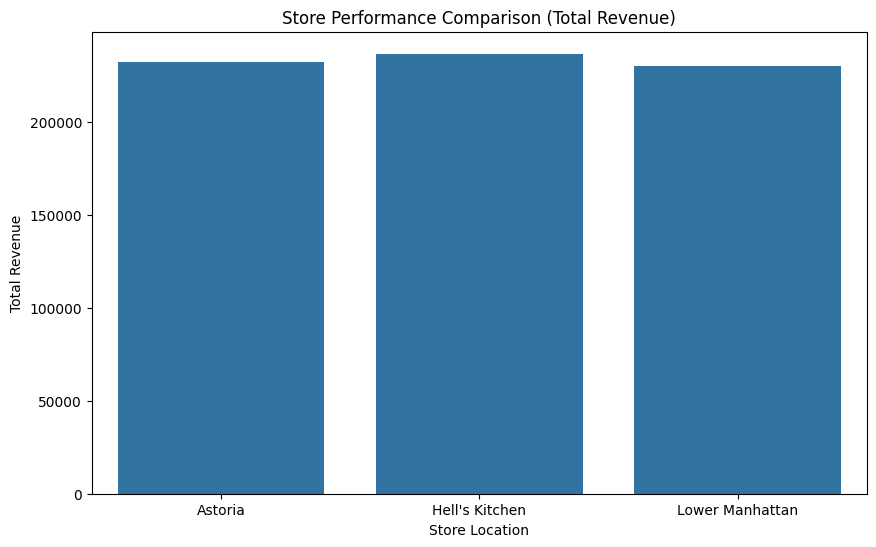

In [28]:
# Calculate total revenue and number of transactions per store
store_performance = df.groupby('store_location').agg({
    'Total_bill': 'sum',
    'transaction_id': 'count'
}).reset_index()

print(store_performance)

# Plot store performance (Total Revenue)
plt.figure(figsize=(10, 6))
sns.barplot(x='store_location', y='Total_bill', data=store_performance)
plt.title('Store Performance Comparison (Total Revenue)')
plt.xlabel('Store Location')
plt.ylabel('Total Revenue')
plt.show()

# 9.Customer Purchase Behavior

     product_category  products_per_transaction
0              Bakery                  1.018337
1             Branded                  1.038822
2              Coffee                  1.527835
3        Coffee beans                  1.042784
4  Drinking Chocolate                  1.522236
5            Flavours                  1.548012
6           Loose Tea                  1.000000
7  Packaged Chocolate                  1.000000
8                 Tea                  1.534401


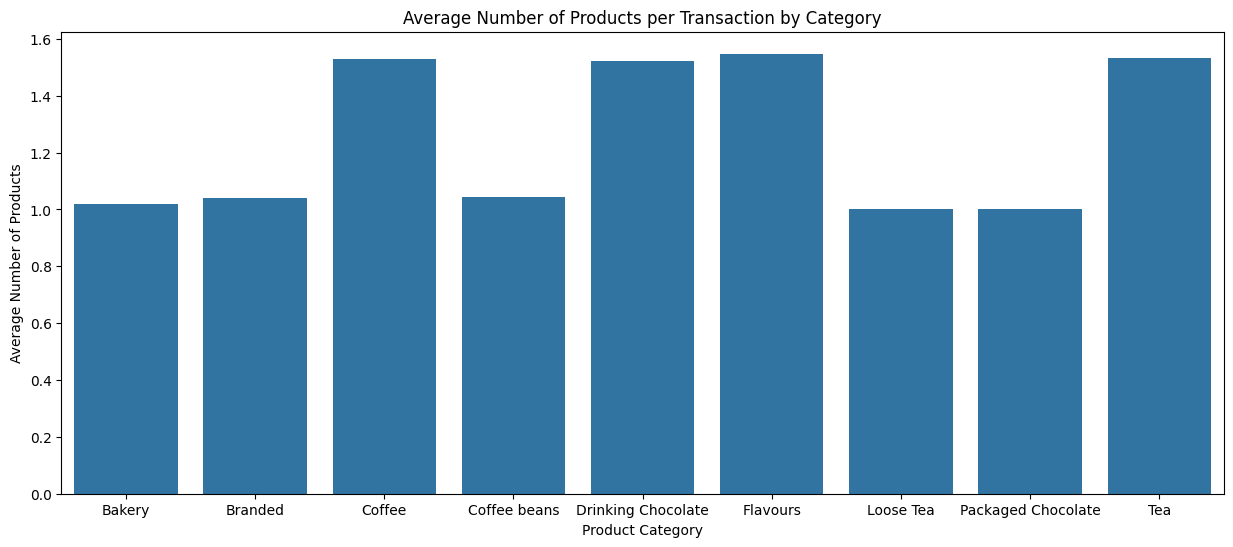

In [30]:
# Calculate average number of products purchased per transaction
df['products_per_transaction'] = df.groupby('transaction_id')['transaction_qty'].transform('sum')
average_products = df.groupby('product_category')['products_per_transaction'].mean().reset_index()

print(average_products)

# Plot the average number of products per transaction by category
plt.figure(figsize=(15, 6))
sns.barplot(x='product_category', y='products_per_transaction', data=average_products)
plt.title('Average Number of Products per Transaction by Category')
plt.xlabel('Product Category')
plt.ylabel('Average Number of Products')
plt.show()

# 10.Product Size Preference

          Size  transaction_qty
0        Large            68540
1  Not Defined            54321
2      Regular            70186
3        Small            21423


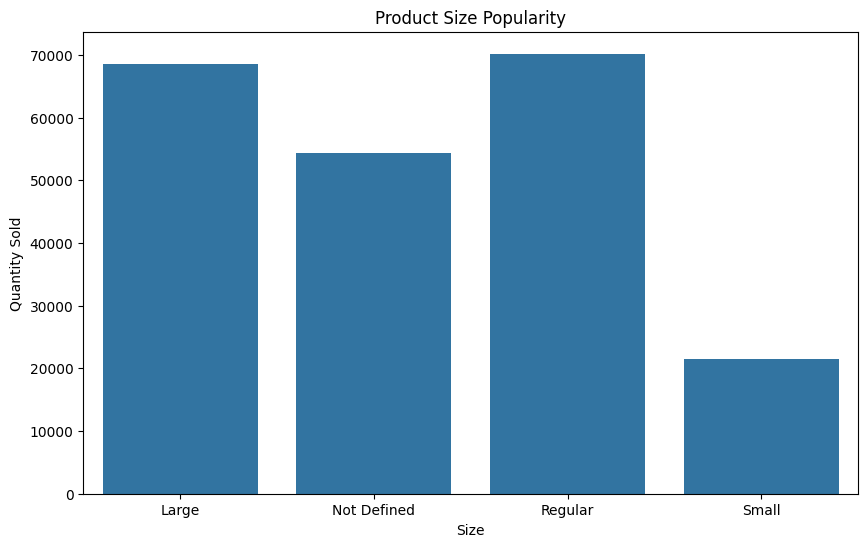

In [32]:
# Calculate the popularity of each product size
size_popularity = df.groupby('Size')['transaction_qty'].sum().reset_index()

print(size_popularity)

# Plot the popularity of each product size
plt.figure(figsize=(10, 6))
sns.barplot(x='Size', y='transaction_qty', data=size_popularity)
plt.title('Product Size Popularity')
plt.xlabel('Size')
plt.ylabel('Quantity Sold')
plt.show()